## CAPSTONE 2

### Narrative Analytics and Experimentation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
%matplotlib inline

In [11]:
data = pd.read_csv('./oakland_street_cleaning_citation/street_sweeping_data.csv')

In [18]:
data.head()

,Citation Number,Citation Date,Citation Time,Violation Code,Violation Description,Location,Issued Amount,Location 1,Zip Codes
0,1708958182,2013-01-11T00:00:00.000,01:06,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,4439 PARK BLVD,66.0,"{'latitude': '37.808653', 'longitude': '-122.2...",1480.0
1,1708956126,2013-01-17T00:00:00.000,01:19,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,5376 BANCROFT AV,66.0,"{'latitude': '37.771845', 'longitude': '-122.2...",1188.0
2,1709160493,2013-02-08T00:00:00.000,10:06,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,4119 BAYO ST,66.0,"{'latitude': '37.7909', 'longitude': '-122.191...",1492.0
3,1709255365,2013-02-16T00:00:00.000,02:26,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,150 21ST ST,66.0,"{'latitude': '37.810045', 'longitude': '-122.2...",1489.0
4,1709382290,2013-03-01T00:00:00.000,00:40,0240-10-28T00:00:00.000,NO PARK CERTAIN HRS,4537 BOND ST,66.0,"{'latitude': '37.773132', 'longitude': '-122.2...",1188.0


For exploration purpose lets see the total number of citation for the three years across the zipcodes in Oakland.

In [44]:
counts_data = pd.DataFrame(data['Zip Codes'].value_counts()) 
counts_data

,Zip Codes
1188.0,42478
1484.0,41107
1483.0,38917
1489.0,35250
1486.0,33394
1485.0,26575
1481.0,23583
1487.0,22742
1493.0,22207
1480.0,19564


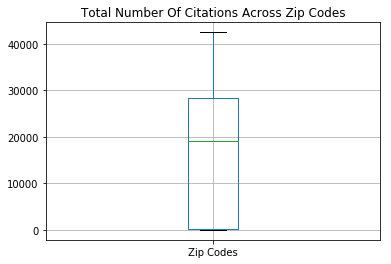

In [105]:
counts_data.boxplot()
plt.title('Total Number Of Citations Across Zip Codes');

we can observe from the above numbers that the total number of street parking citation across the zipcodes has a large spread.Specially six of the zipcodes does not have a comparable number of citation with the other 14 zipcodes but from the boxplot on the above we do not have evidence that they are outliers.This might be due to a number of reasons such as being metropolitan area,suberb,industrial areas,agricultural areas,upscale residences and so forth.

In [101]:
data['Location'].value_counts().count()

98899

The above value shows the total number of streets that parking citation was recorded.

From the street parking citation fines Issued Amount lets look how much revenue does the city of Oakland collected in the years 2013 - 2015.

In [45]:
data['Issued Amount'].sum()

25567690.0

The city of Oakland pays millions of dollars to clean the streets,And because of cars parked on the streets the cleaning work is not as efficient as it should be.On my understanding even if the city gets millions of dollars on citation,it would be an amount the city would rather be willing to pay for an efficient cleaning work.This leads me to conclude that millions of dollars is wasted because of luck of unawareness and causiousness during parking vehicles on streets.

Lets visualize using a line plots the number of citations per day over the three years (2013 - 2015).

In [60]:
counts_per_day = data['Citation Date'].value_counts()
counts_per_day.head()

2013-10-14T00:00:00.000    1819
2014-04-14T00:00:00.000    1467
2013-01-14T00:00:00.000    1432
2013-01-08T00:00:00.000    1414
2013-10-08T00:00:00.000    1411
Name: Citation Date, dtype: int64

first lets sort the time (Date) past to present;  

In [86]:
df_counts_per_day = pd.DataFrame({'Date' : counts_per_day.index, 'Counts': counts_per_day.values})
df_counts_per_day['Date'] = pd.to_datetime(df_counts_per_day['Date'])

In [88]:
df_counts_per_day.head()

,Date,Counts
0,2013-10-14,1819
1,2014-04-14,1467
2,2013-01-14,1432
3,2013-01-08,1414
4,2013-10-08,1411


In [91]:
df_counts_per_day = df_counts_per_day.sort_values(by = 'Date')
df_counts_per_day.head()

,Date,Counts
159,2013-01-02,687
157,2013-01-03,688
146,2013-01-04,710
560,2013-01-05,219
723,2013-01-06,105


Now lets plot the daily number of citations over the three years period to see a trend that arises due too time effect.

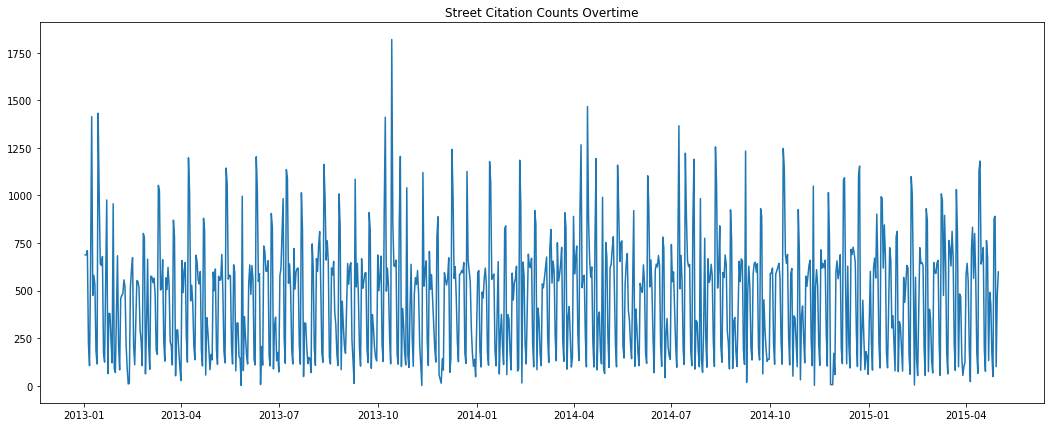

In [107]:
plt.figure(figsize = (18,7))
plt.plot(df_counts_per_day['Date'], df_counts_per_day['Counts']);
plt.title("Street Citation Counts Overtime");

From the above plot,we can observe that there is no clear pattern of change that we can draw due too time effect.

From the above senario,we have seen that how much money is wasted over the three years period due to street parking citations;and it should be understood that the city cleanliness is compromised and many people fall in to paying these painfull fines;I am one of them.Based on my situation and from stories told by friends and family i have a general understanding that this incidences happen because of luck of awareness during parking or confusion of days or distractions during parking and so forth.The key question is how do we alert people so that they know they are parking in a wrong street? based on the above causes of street parking citations which are undeliberate, and from public opinions, another additional alert mechaism on top of the sign posts which indicate day and time of street cleaning would have a significant effect in minimizing citations.

*Flashing lights on top of parking sign posts would grab the attention of people who try to park during street parking periods and this would intern reduce the street parking citations.*

In order to check the validity of the above hypothesis, lets design an A/B experimentation and make sure we do it righ.
The two groups we want to compare in this case are the streets signs with flashing light alert (treatment group) and streets signs without(control group).The first step is determining our sample size;lets simple random sample 2 independent samples of 20 streets(Location) each from each Zip Code.This will bring us to a total of 400 samples in control and 400 samples in treatment groups.Our key metric is the number of Street parking citations per day and we will collect that information from the sampled street for both the control and treatment groups.

First and for most lets draw 400 random samples for the next two months from all the Zip Codes streets(Location)and record the number of citations per day for the purpose of A/A testing.And collect another 400 random samples independent to the previous but drawn the same way and record the number of citations per day.Then compare the two samples to determine if their mean number of citations are not different.If there is no significant difference in the sample means then move forward and continue with the A/B test which is comparing the treatment group with the control group.I would prefer to do the Rollout in two phases i.e 50:50;collecting the first 200 random samples from control which are independent to the previous two drawn samples of 400 and 200 random sample from the treatment groups independent to the previously drawn all samples for the first month and then after analysing the first phase i would Rollout the second phase and collect the data for 200 streets more in a sample for the first month in the same way as previous samples.And then analyse the difference.If the the mean number of street parking citation is decreased by over 10%,then the Flashing light alert on top of sign posts has a significant effect on reducing Street cleaning parking citations.therefore it is a good practice to install it throughout the city.